# 临床信息整理

## 当前临床信息合并

In [1]:
library(readxl)
library(tidyverse)
setwd("/nfsshare/nfshome/ming/ESCC")
theme_set(theme_bw(20))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# clinical info
df <- read_excel("assets/clinical/clinical_info_summary_220824.xlsx", sheet = 'Basic')
df <- read_excel(path = "assets/clinical/clinical_info_summary_220824.xlsx", sheet = 'Clinical') %>% 
    merge(df, by = 'sample')

In [3]:
table(df$batch)


batch01 batch02 batch03 batch04 
     10      13      25      25 

In [6]:
# check two clinical infor consistency
addmargins(table(df$sample_type, df$sample_type_detail, useNA = 'ifany'))

,Baseline,Immunochemotherapy,Immunotherapy,NA,Sum
Baseline,48,0,0,0,48
Treat,0,5,16,4,25
Sum,48,5,16,4,73


In [21]:
# NA information
df[is.na(df$sample_type_detail), ]

,sample,patient,sample_type_detail,reason,batch,reach_date,sample_type,sequencing_ype,is_pair,sample_new
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
7,03-YJS-029-T,P04,NA,NA,batch04,2022-08-18,Treat,10X Genomics 5' RNA + TCR,1,P04-Treat
39,03-LZB-055-T,P27,NA,NA,batch04,2022-08-18,Treat,10X Genomics 5' RNA + TCR,1,P27-Treat
41,03-LZX-056-T,P28,NA,NA,batch04,2022-08-18,Treat,10X Genomics 5' RNA + TCR,1,P28-Treat
48,03-BMQ-062-T,P34,NA,NA,batch04,2022-08-18,Treat,10X Genomics 5' RNA + TCR,1,P34-Treat


In [10]:
# patient level clinical info
df[['is_pair']] = 0
for (pid in unique(df$patient)) {
    tmp <- df %>%
        filter(patient == pid) %>%
        pull(sample_type)
    if (sum(! is.na(tmp)) == 2) {
        df[df$patient == pid, 'is_pair'] <- 1
    }
}
df %>% filter(is_pair == 1) %>% pull(patient) %>% unique() %>% length()

[1] 22

In [11]:
# add new sample id
df <- df %>% 
    mutate(sample_new = paste(patient, sample_type, sep = '-')) %>%
    arrange(sample_new)
write_tsv(x = df, file = "assets/clinical/merge_clinical.tsv")
df %>% head(2)

,sample,patient,sample_type_detail,reason,batch,reach_date,sample_type,sequencing_ype,is_pair,sample_new
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,01-ZSM-025-T,P01,Baseline,NA,batch01,2022-03-31,Baseline,10X Genomics 5' RNA + TCR,1,P01-Baseline
2,03-ZSM-025-T,P01,Immunotherapy,NA,batch03,2022-07-28,Treat,10X Genomics 5' RNA + TCR,1,P01-Treat


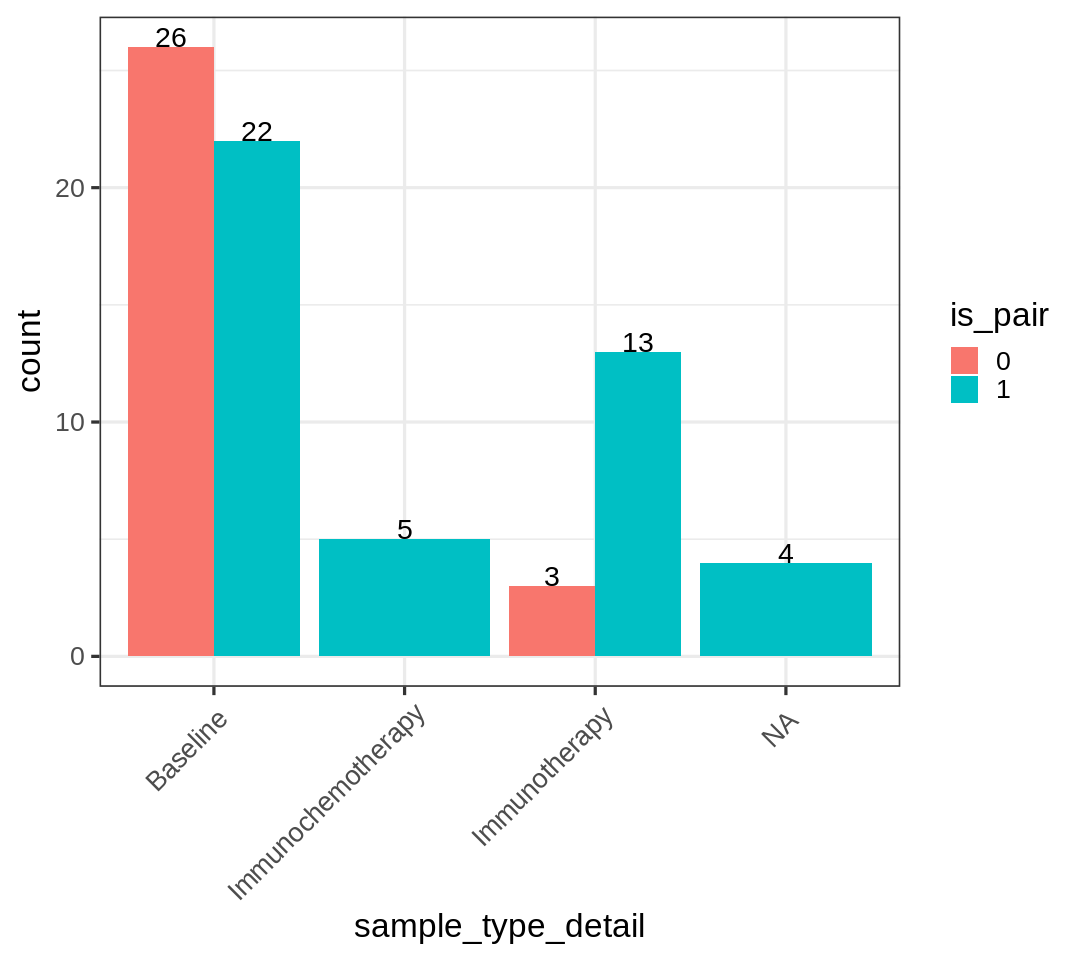

In [61]:
options(repr.plot.width = 9, repr.plot.height = 8)
dp <- df %>% count(sample_type_detail, is_pair)
ggplot(dp, aes(x = sample_type_detail, y = n, fill = as.factor(is_pair))) + 
    geom_bar(stat = 'identity', 
             position = position_dodge(0.9)) +
    geom_text(aes(label = n), 
              position = position_dodge(0.9), 
              size = 6, vjust = 0) + 
    labs(fill = 'is_pair', y = 'count') + 
    theme(axis.text.x = element_text(angle = 45, vjust = 0.95, hjust = 0.95))
ggsave("assets/clinical/barplot_sample_type.png", width = 9, height = 8)

### Summary

已经处理的 75 个样本中（每个样本有RNA + TCR两份数据, 6 个样本有 BCR 数据）：

- 2 个样本疑似在 batch03, batch04 中重复：01-YGX-066-T, 01-JG-067-T; 已经在整理临床信息时候从 batch04 中去除，目前一共 73 个样本；
- 原 batch04 中临床信息和交付清单中存在冲突，在整理临床信息时已经处理完毕，如上，整理后数据无冲突；
- 目前共计 22 例患者具有治疗前后的配对数据

## batch03

In [62]:
df03 <- df %>% 
    filter(batch == 'batch03')

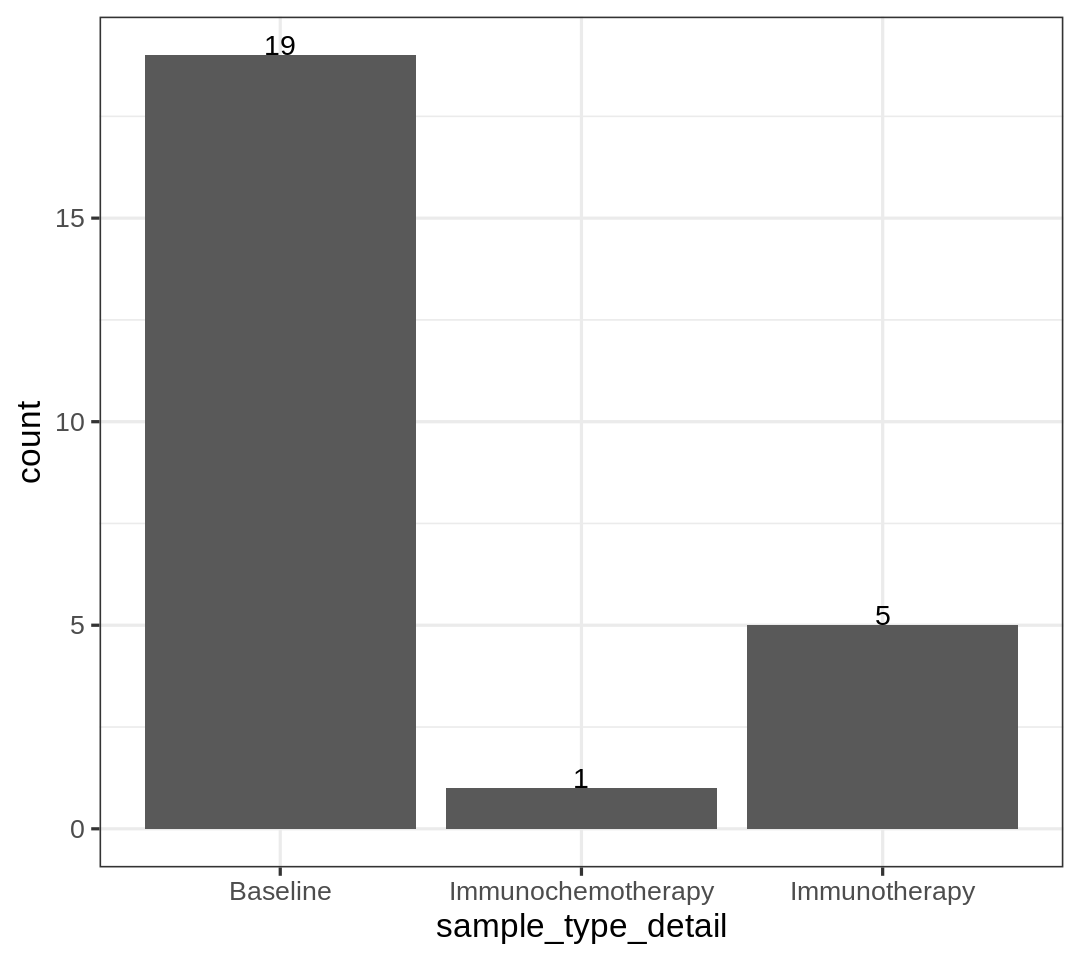

In [63]:
ggplot(df03, aes(x  = sample_type_detail)) + 
    geom_bar() + 
    geom_text(aes(label = ..count..), stat = 'count', size = 6, vjust = 0)

In [64]:
length(unique(df03$sample))

[1] 25

## batch04

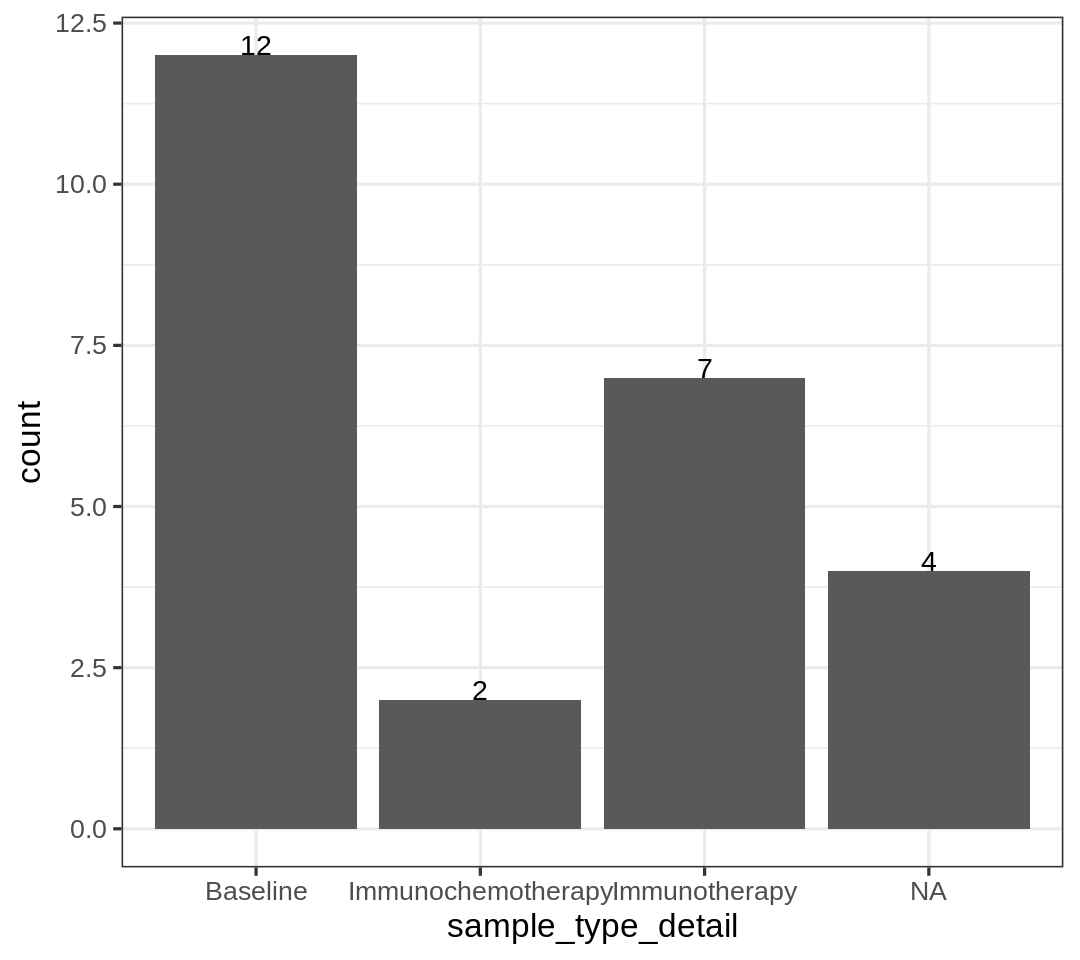

In [65]:
df04 <- df %>% 
    filter(batch == 'batch04')
ggplot(df04, aes(x  = sample_type_detail)) + 
    geom_bar() + 
    geom_text(aes(label = ..count..), stat = 'count', size = 6, vjust = 0)

In [66]:
length(unique(df04$sample))

[1] 25

## show clinicals

In [13]:
require(tidyverse)
theme_set(theme_bw(base_size = 22))

In [14]:
id_map <- read_tsv(file = '../assets/clinical/merge_clinical_0914_id_mapping.tsv')
clin <- read_tsv(file = '../assets/clinical/merge_clinical_0914_clinical_info.tsv') 
df <- merge(id_map, clin, by = 'patient')

Rows: 73 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (6): batch, patient, sample_old, sample, sample_type, sequencing_type
date (1): reach_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 51 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): patient, treatment, prognosis, sample_old_baseline, sample_old_treat
dbl  (1): is_pair
date (1): evaluated_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


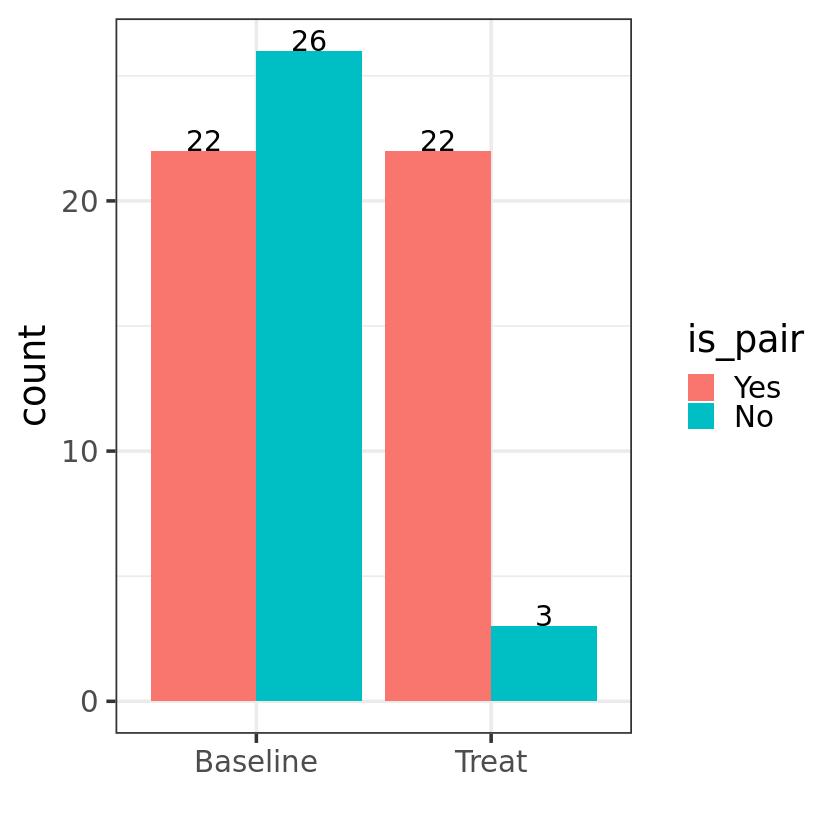

In [12]:
dp <- df %>% 
    count(sample_type, is_pair) %>%
    mutate(is_pair = case_when(
        is_pair == 1 ~ 'Yes',
        is_pair == 0 ~ 'No'
    ))
ggplot(dp, aes(x = sample_type, y = n, fill = factor(is_pair, levels = c('Yes', 'No')))) + 
    geom_bar(stat = 'identity', 
             position = position_dodge(0.9)) +
    geom_text(aes(label = n), 
              position = position_dodge(0.9), 
              size = 6, vjust = 0) + 
    theme_bw(22) +
    labs(fill = 'is_pair', y = 'count', x = '')

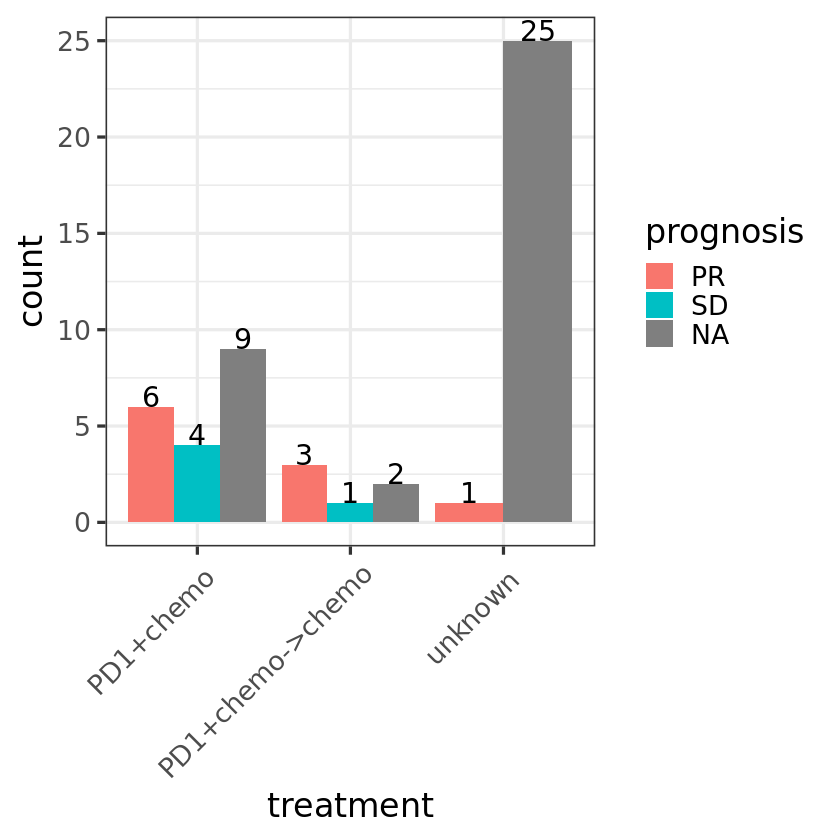

In [6]:
ggplot(clin, aes(x = treatment, fill = as.factor(prognosis))) + 
    geom_bar(stat = 'count', position = position_dodge(0.9)) +
    geom_text(stat = 'count',
              aes(label = ..count..), 
              position = position_dodge(0.9), 
              size = 6, vjust = 0) + 
    theme_bw(20) +
    labs(fill = 'prognosis', y = 'count') + 
    theme(axis.text.x = element_text(angle = 45, vjust = 0.95, hjust = 0.95))

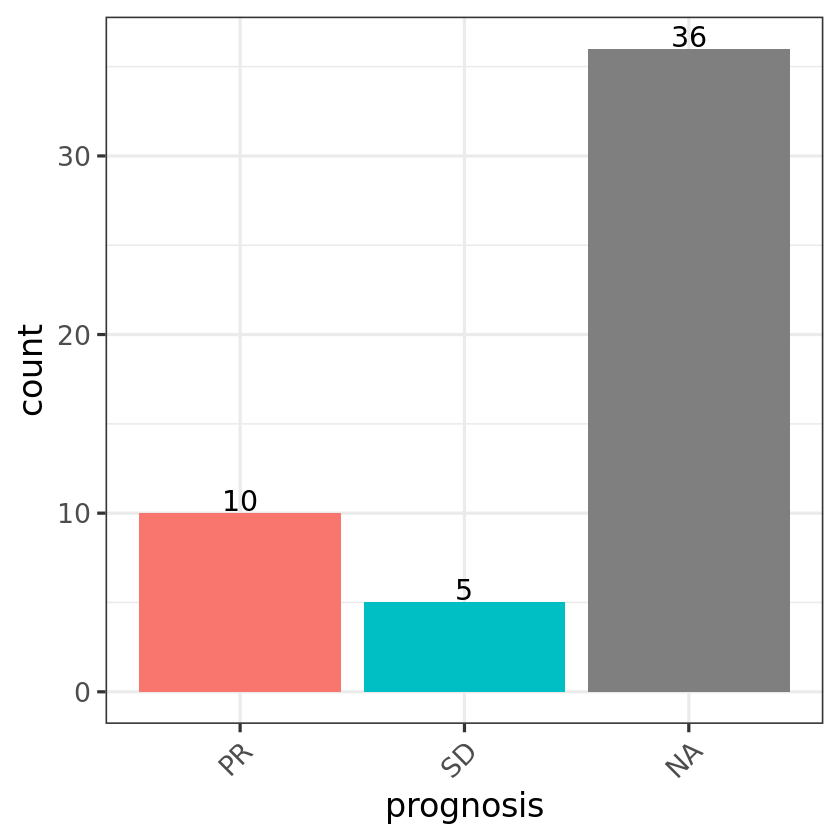

In [26]:
ggplot(clin, aes(x = prognosis, fill = prognosis)) + 
    geom_bar(stat = 'count', position = position_dodge(.5)) + 
    geom_text(stat = 'count',
              aes(label = ..count..),
              size = 6, vjust = -.1) +
    theme_bw(20) +
    labs(x = 'prognosis', y = 'count') + 
    theme(axis.text.x = element_text(angle = 45, vjust = 0.95, hjust = 0.95), 
          legend.position = 'none')

## 2022-11-23 version

In [17]:
require(tidyverse)
require(ggsci)

theme_set(theme_bw(base_size = 22))

fclin <- '../assets/clinical/merge_clinical_1123.xlsx'

id_map <- readxl::read_xlsx(fclin, sheet = 'id_mapping', na = 'NA')
clin <- readxl::read_xlsx(fclin, sheet = 'clinical_info', na = 'NA') %>%
    mutate(prognosis = factor(prognosis, levels = c('CR', 'PR', 'SD', 'PD')))
df <- merge(id_map, clin, by = 'patient')

Loading required package: ggsci



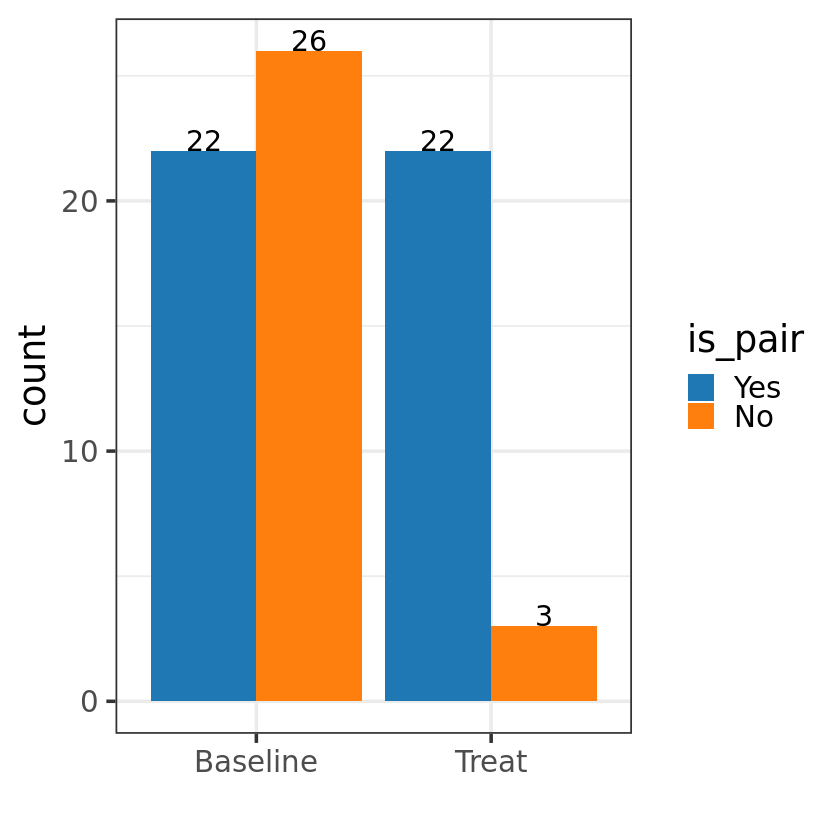

In [19]:
dp <- df %>% 
    count(sample_type, is_pair) %>%
    mutate(is_pair = case_when(
        is_pair == 1 ~ 'Yes',
        is_pair == 0 ~ 'No'
    ))
ggplot(dp, aes(x = sample_type, y = n, fill = factor(is_pair, levels = c('Yes', 'No')))) + 
    geom_bar(stat = 'identity', 
             position = position_dodge(0.9)) +
    geom_text(aes(label = n), 
              position = position_dodge(0.9), 
              size = 6, vjust = 0) + 
    theme_bw(22) +
    labs(fill = 'is_pair', y = 'count', x = '') + 
    scale_fill_d3()

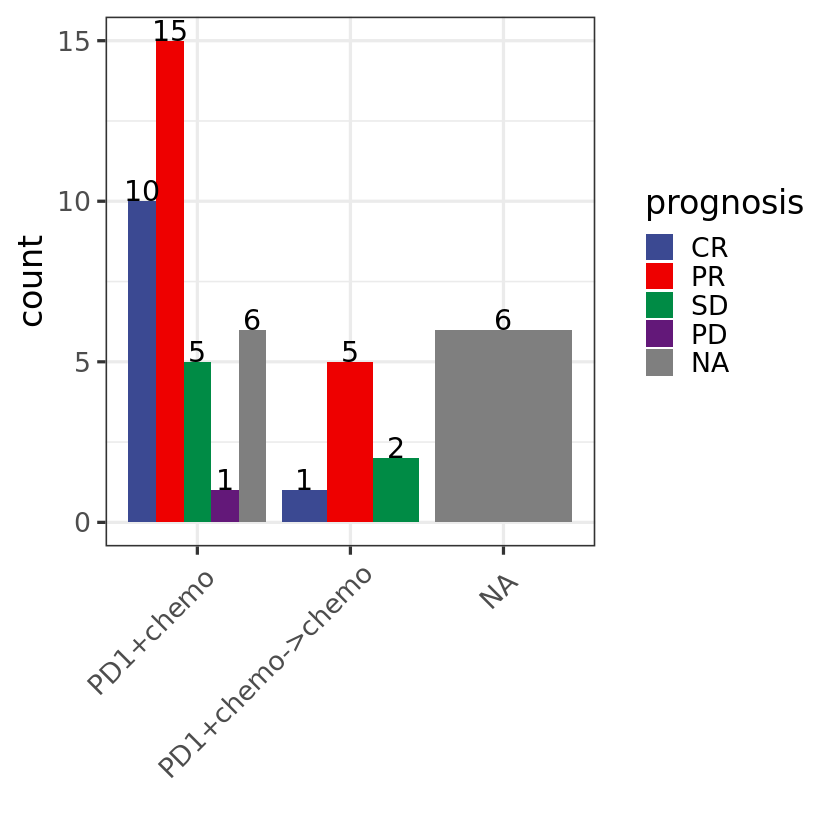

In [27]:
ggplot(clin, aes(x = treatment, fill = as.factor(prognosis))) + 
    geom_bar(stat = 'count', position = position_dodge(0.9)) +
    geom_text(stat = 'count',
              aes(label = ..count..), 
              position = position_dodge(0.9), 
              size = 6, vjust = 0) + 
    labs(fill = 'prognosis', y = 'count', x = '') + 
    scale_fill_aaas(na.value = 'grey50') +
    theme_bw(20) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.95, hjust = 0.95))

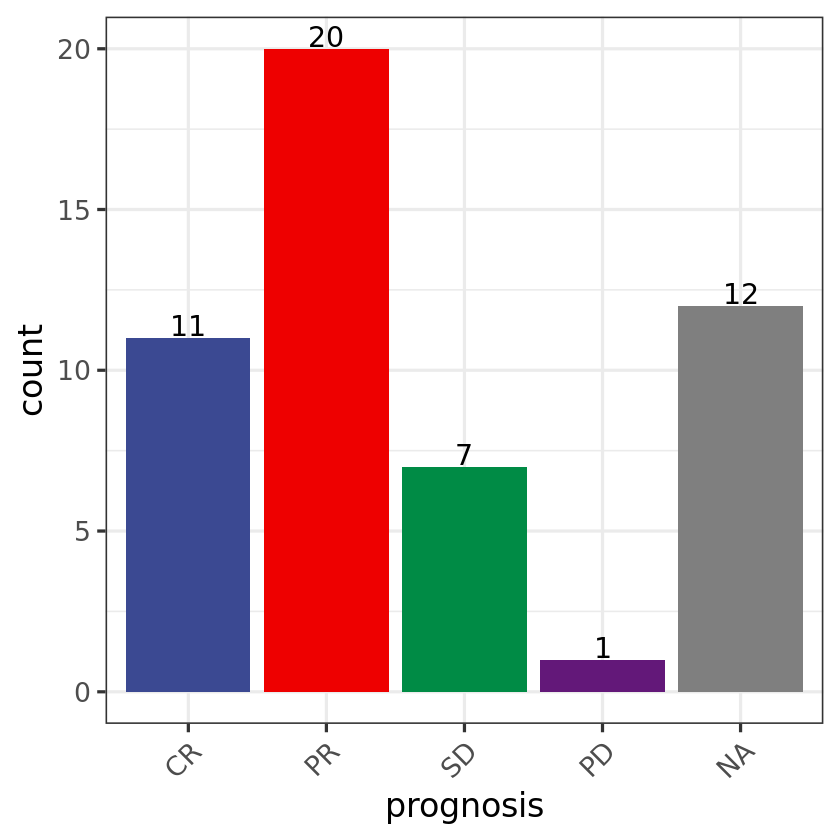

In [29]:
ggplot(clin, aes(x = prognosis, fill = prognosis)) + 
    geom_bar(stat = 'count', position = position_dodge(.5)) + 
    geom_text(stat = 'count',
              aes(label = ..count..),
              size = 6, vjust = -.1) +
    scale_fill_aaas(na.value = 'grey50') +
    theme_bw(20) +
    labs(x = 'prognosis', y = 'count', x = '') + 
    theme(axis.text.x = element_text(angle = 45, vjust = 0.95, hjust = 0.95), 
          legend.position = 'none')

## 2022-12-01 version

- update treatment of patients
- add prognosis group

In [34]:
require(tidyverse)
require(ggsci)
require(patchwork)

theme_set(theme_bw(base_size = 22))

fclin <- '../assets/clinical/merge_clinical_1201.xlsx'

id_map <- readxl::read_xlsx(fclin, sheet = 'id_mapping', na = 'NA')
clin <- readxl::read_xlsx(fclin, sheet = 'clinical_info', na = 'NA') %>%
    mutate(prognosis = factor(prognosis, levels = c('CR', 'PR', 'SD', 'PD')))
df <- merge(id_map, clin, by = 'patient')

Loading required package: patchwork



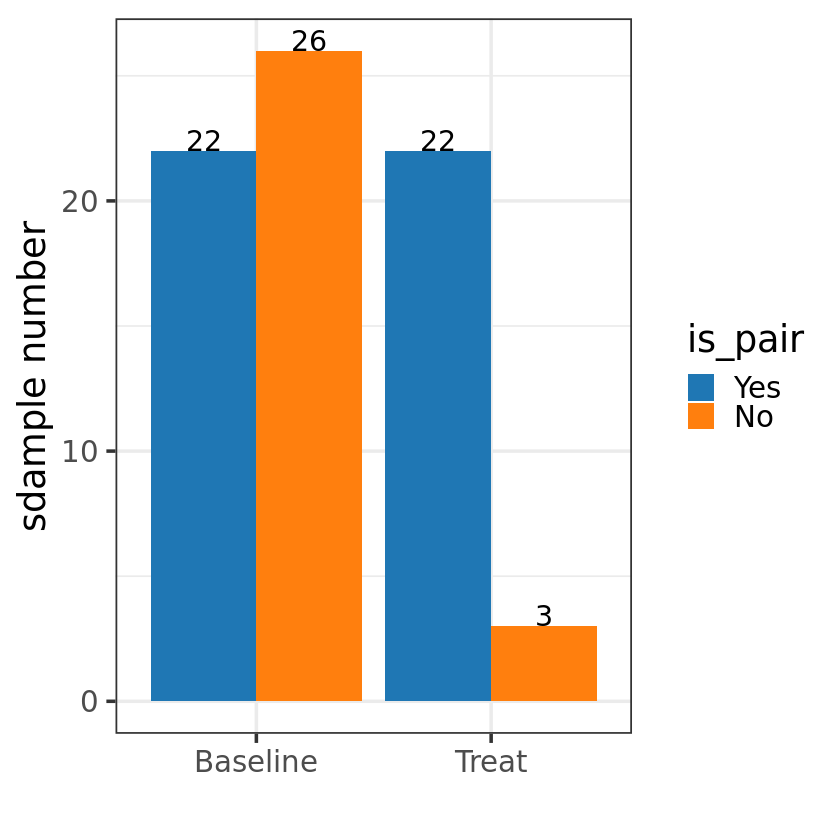

In [30]:
dp <- df %>% 
    count(sample_type, is_pair) %>%
    mutate(is_pair = case_when(
        is_pair == 1 ~ 'Yes',
        is_pair == 0 ~ 'No'
    ))
ggplot(dp, aes(x = sample_type, y = n, fill = factor(is_pair, levels = c('Yes', 'No')))) + 
    geom_bar(stat = 'identity', 
             position = position_dodge(0.9)) +
    geom_text(aes(label = n), 
              position = position_dodge(0.9), 
              size = 6, vjust = 0) + 
    theme_bw(22) +
    labs(fill = 'is_pair', y = 'sdample number', x = '') + 
    scale_fill_d3()

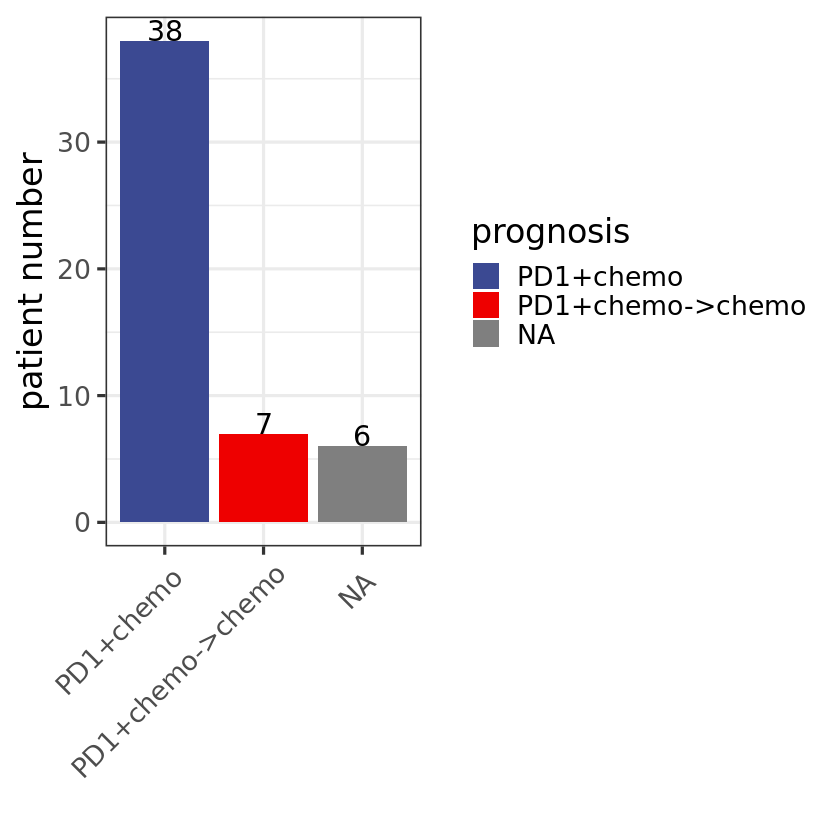

In [29]:
ggplot(clin, aes(x = treatment, fill = as.factor(treatment))) + 
    geom_bar(stat = 'count', position = position_dodge(0.9)) +
    geom_text(stat = 'count',
              aes(label = ..count..), 
              position = position_dodge(0.9), 
              size = 6, vjust = 0) + 
    labs(fill = 'prognosis', y = 'patient number', x = '') + 
    scale_fill_aaas(na.value = 'grey50') +
    theme_bw(20) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.95, hjust = 0.95))

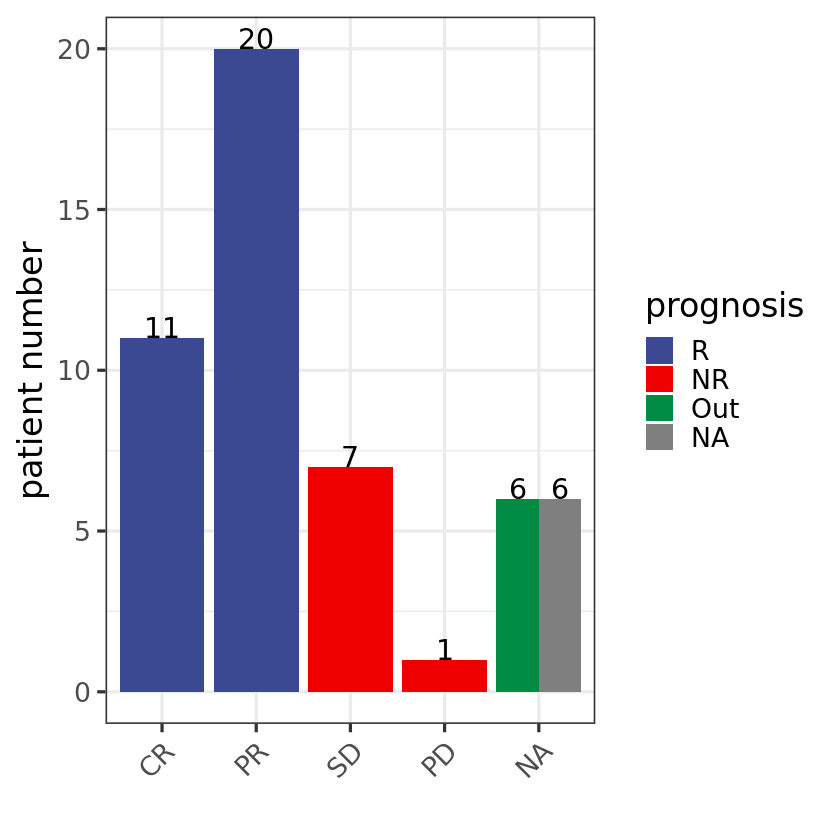

In [31]:
ggplot(clin, aes(x = prognosis, fill = factor(group, levels = c('R', 'NR', 'Out', 'NA')))) + 
    geom_bar(stat = 'count', position = position_dodge(0.9)) +
    geom_text(stat = 'count',
              aes(label = ..count..), 
              position = position_dodge(0.9), 
              size = 6, vjust = 0) + 
    labs(fill = 'prognosis', y = 'patient number', x = '') + 
    scale_fill_aaas(na.value = 'grey50') +
    theme_bw(20) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.95, hjust = 0.95))

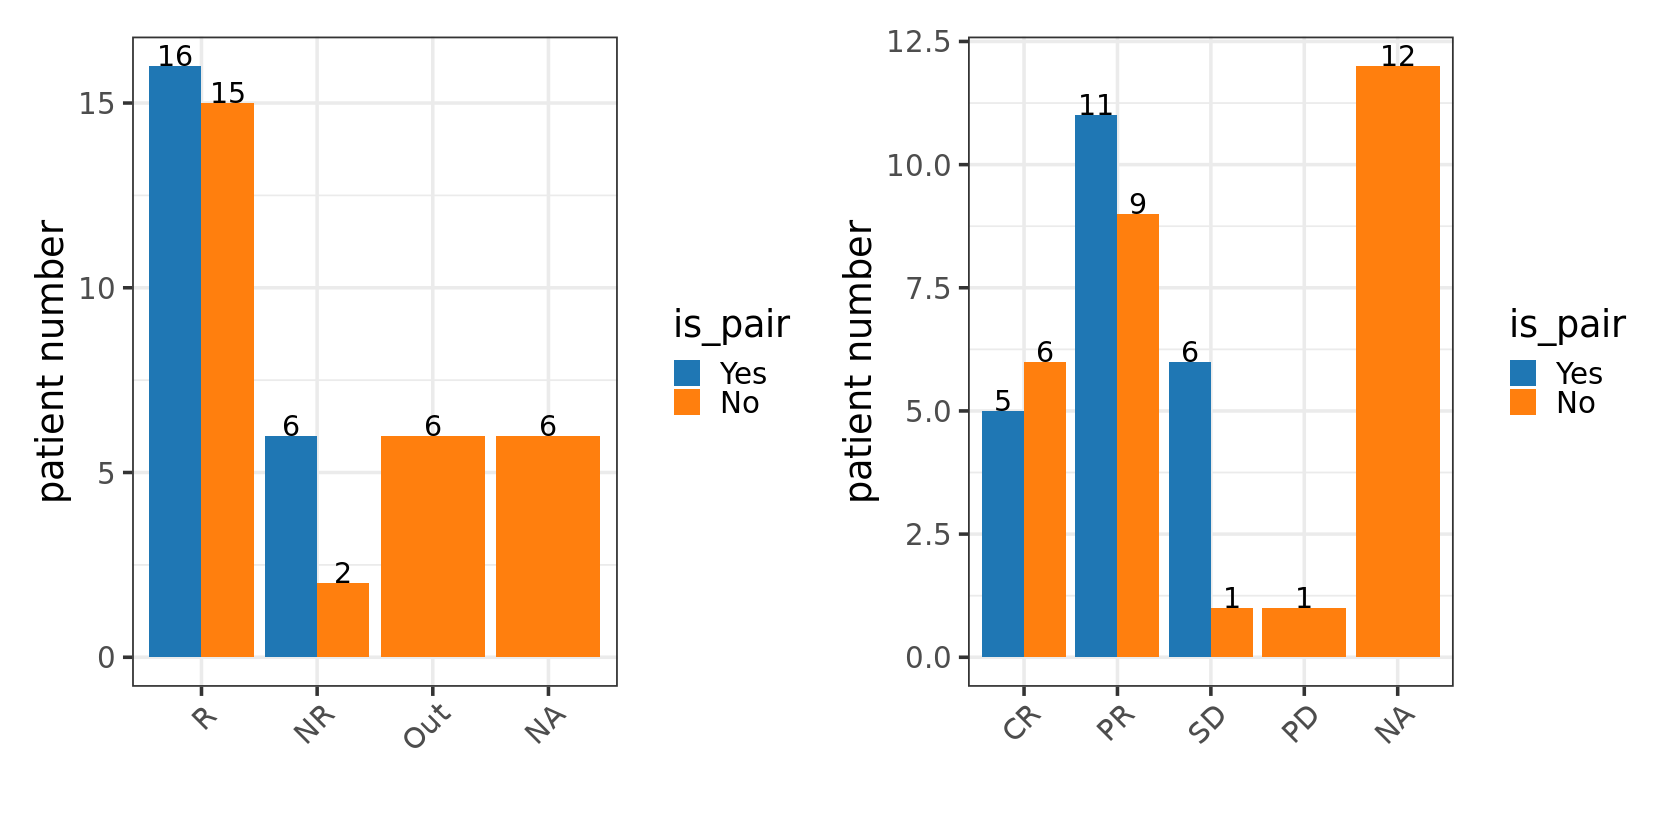

In [43]:
p1 <- df %>% 
    select(patient, is_pair, group) %>%
    distinct() %>%
    count(group, is_pair) %>%
    mutate(is_pair = case_when(
        is_pair == 1 ~ 'Yes',
        is_pair == 0 ~ 'No'
    )) %>%
    mutate(group = factor(group, levels = c('R', 'NR', 'Out', 'NA'))) %>%
    ggplot(aes(x = group, y = n, fill = factor(is_pair, levels = c('Yes', 'No')))) + 
        geom_bar(stat = 'identity', 
                 position = position_dodge(0.9)) +
        geom_text(aes(label = n), 
                  position = position_dodge(0.9), 
                  size = 6, vjust = 0) + 
        theme_bw(22) +
        labs(fill = 'is_pair', y = 'patient number', x = '') + 
        scale_fill_d3() +
        theme(axis.text.x = element_text(angle = 45, hjust = .9))
p2 <- clin %>%
    mutate(is_pair = case_when(
        is_pair == 1 ~ 'Yes',
        is_pair == 0 ~ 'No'
    )) %>%
    mutate(prognosis = factor(prognosis, levels = c('CR', 'PR', 'SD', 'PD', 'NA'))) %>%
    ggplot(aes(x = prognosis, fill = factor(is_pair, levels = c('Yes', 'No')))) + 
        geom_bar(stat = 'count', 
                 position = position_dodge(0.9)) +
        geom_text(stat = 'count',
                  aes(label = ..count..),
                  position = position_dodge(0.9), 
                  size = 6, vjust = 0) + 
        theme_bw(22) +
        labs(fill = 'is_pair', y = 'patient number', x = '') + 
        scale_fill_d3() +
        theme(axis.text.x = element_text(angle = 45, hjust = .9))
p1 | p2

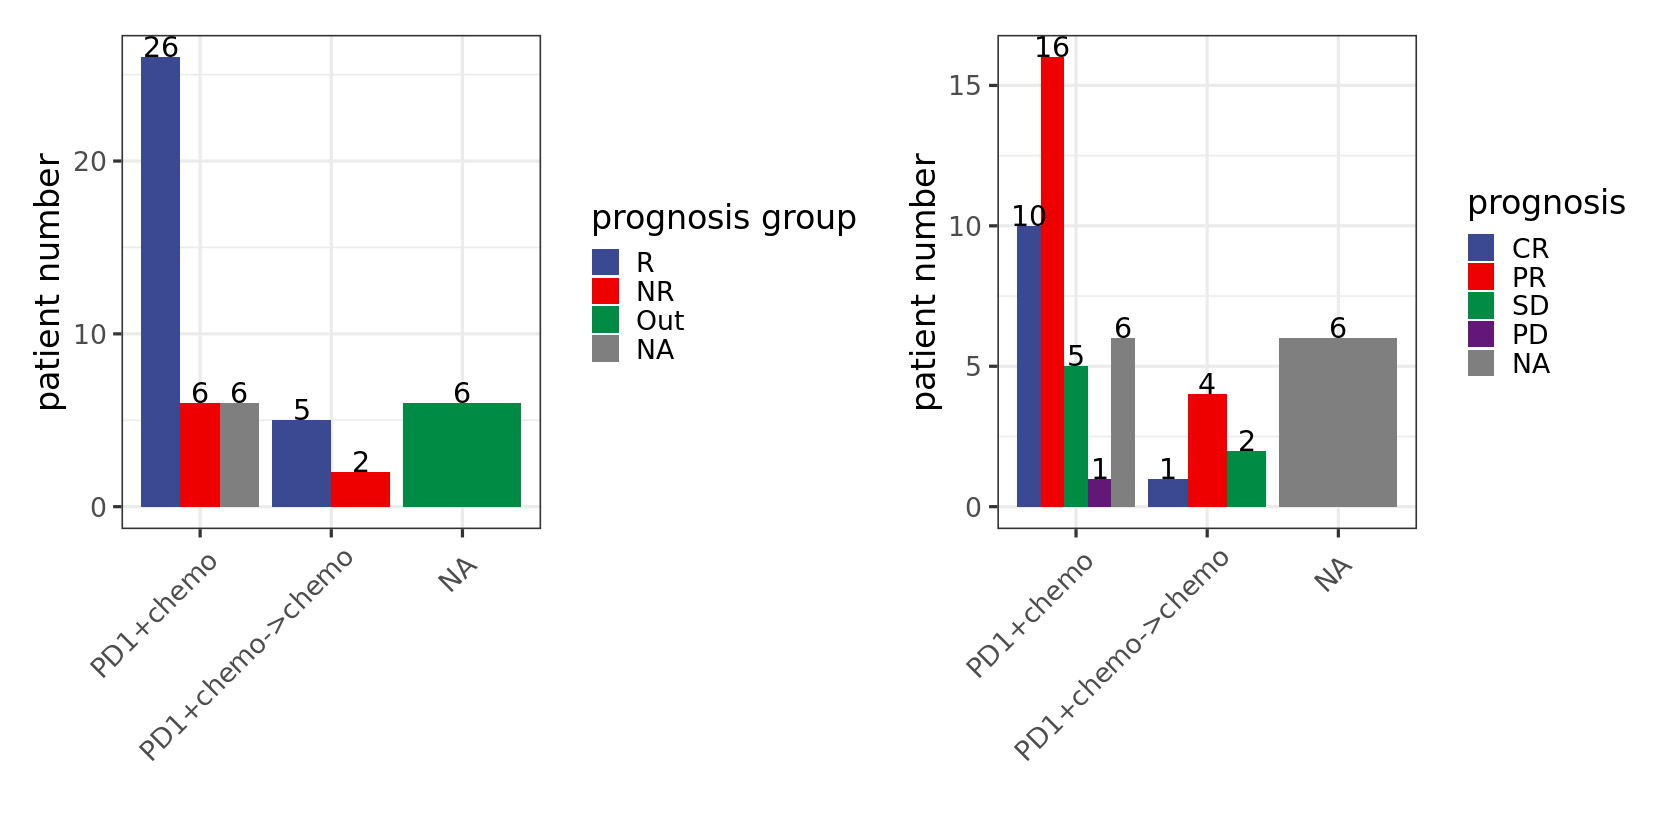

In [36]:
p1 <- ggplot(clin, aes(x = treatment, fill = factor(group, levels = c('R', 'NR', 'Out', 'NA')))) + 
    geom_bar(stat = 'count', position = position_dodge(0.9)) +
    geom_text(stat = 'count',
              aes(label = ..count..), 
              position = position_dodge(0.9), 
              size = 6, vjust = 0) + 
    labs(fill = 'prognosis group', y = 'patient number', x = '') + 
    scale_fill_aaas(na.value = 'grey50') +
    theme_bw(20) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.95, hjust = 0.95))
p2 <- ggplot(clin, aes(x = treatment, fill = factor(prognosis, levels = c('CR', 'PR', 'SD', 'PD', 'NA')))) + 
    geom_bar(stat = 'count', position = position_dodge(0.9)) +
    geom_text(stat = 'count',
              aes(label = ..count..), 
              position = position_dodge(0.9), 
              size = 6, vjust = 0) + 
    labs(fill = 'prognosis', y = 'patient number', x = '') + 
    scale_fill_aaas(na.value = 'grey50') +
    theme_bw(20) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.95, hjust = 0.95))
options(repr.plot.width = 14, repr.plot.height = 7)
p1 | p2

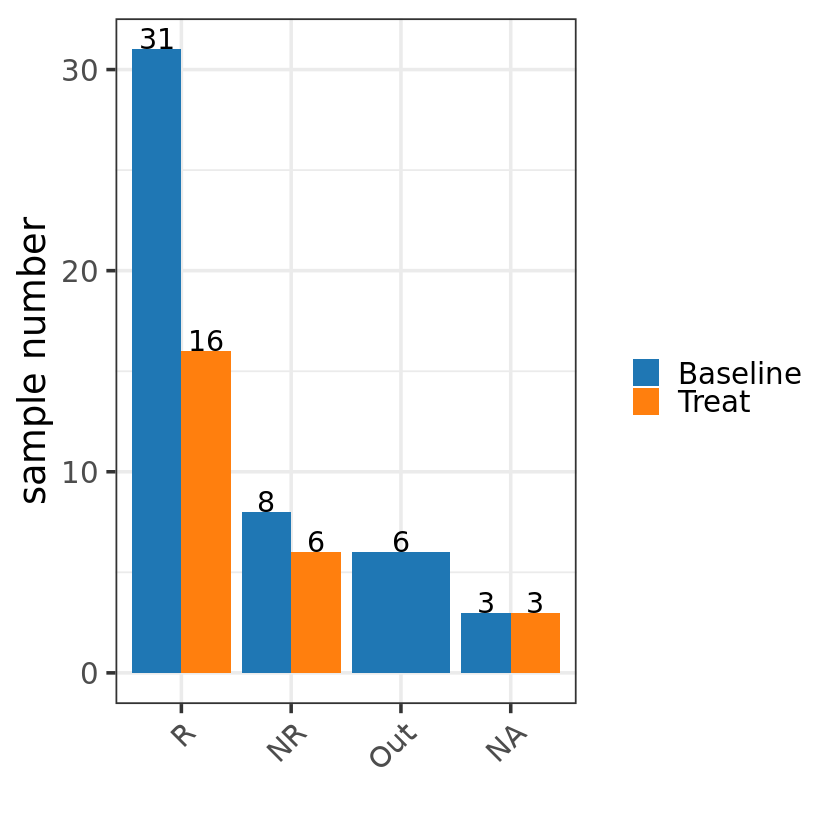

In [26]:
dp <- df %>% 
    count(sample_type, group) %>%
    mutate(group = factor(group, levels = c('R', 'NR', 'Out', 'NA'))) 

ggplot(dp, aes(x = group, y = n, fill = sample_type)) + 
    geom_bar(stat = 'identity', 
             position = position_dodge(0.9)) +
    geom_text(aes(label = n), 
              position = position_dodge(0.9), 
              size = 6, vjust = 0) + 
    theme_bw(22) +
    labs(fill = '', y = 'sample number', x = '') + 
    scale_fill_d3() +
    theme(axis.text.x = element_text(angle = 45, hjust = .95))